In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

D:\Installed\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


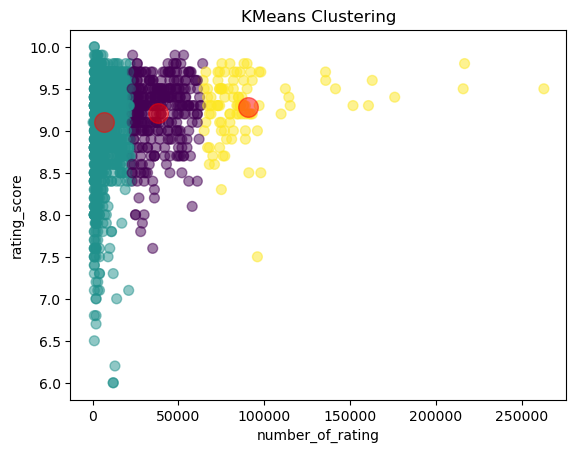

In [2]:
data = pd.read_csv("dataIQIYI-Copy1.csv")
# Xây dựng ma trận dữ liệu đầu vào cho KMeans
X = data[['number_of_rating', 'rating_score']]

# Khởi tạo và fit model KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
# Gán nhãn cho dữ liệu
data['label'] = kmeans.labels_
# Gán nhãn cho cột "Hot"
#0: normal, 1: popular, 2:unpopular
data['Hot'] = data['label'].map({0: '0', 1: '1', 2: '2'})
plt.scatter(data['number_of_rating'], data['rating_score'], c=data['label'], cmap='viridis', s=50, alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('number_of_rating')
plt.ylabel('rating_score')
plt.title('KMeans Clustering')
plt.show()

In [14]:
print(data[['movie_title', 'number_of_rating', 'rating_score', 'H']])
data.to_csv("dataIQIYI-Copy1.csv", index=False)

                                  movie_title  number_of_rating  rating_score  \
0                    Mật Tình Thất Tâm Phần 1             14000           8.4   
1     【Lồng Tiếng】Cửa Hàng Tiện Lợi Saet Byul              1600           9.4   
2                           Sắc Xanh Lãng Mạn              4800           9.3   
3                       Quy Lộ (Đường Về Nhà)             56800           9.7   
4                            Đời Sống Ngục Tù              8900           9.6   
...                                       ...               ...           ...   
1606                       Chiến Cơ Cảnh Giới              2300           9.6   
1607                          Thám Tử Đã Chết              6100           9.6   
1608         Vua Bóng Chuyền Haikyuu - Phần 3             33500           9.4   
1609    Nghe Bảo Cô Định Tán Bố Con Tôi Mùa 4              6000           9.4   
1610                    Hội Trưởng Là Hầu Gái              4600           9.7   

     Popularity Levels  
0 